        Price           Adj Close               Close                High  \
0      Ticker                GOOG                GOOG                GOOG   
1  2024-01-02  139.21810913085938  139.55999755859375  140.61500549316406   
2  2024-01-03  140.01614379882812  140.36000061035156  141.08999633789062   
3  2024-01-04   137.7018280029297   138.0399932861328  140.63499450683594   
4  2024-01-05   137.0534210205078  137.38999938964844  138.80999755859375   

                  Low                Open    Volume  
0                GOOG                GOOG      GOOG  
1  137.74000549316406  139.60000610351562  20071900  
2  138.42999267578125  138.60000610351562  18974300  
3  138.00999450683594  139.85000610351562  18253300  
4  136.85000610351562   138.3520050048828  15433200  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      234 non-null   

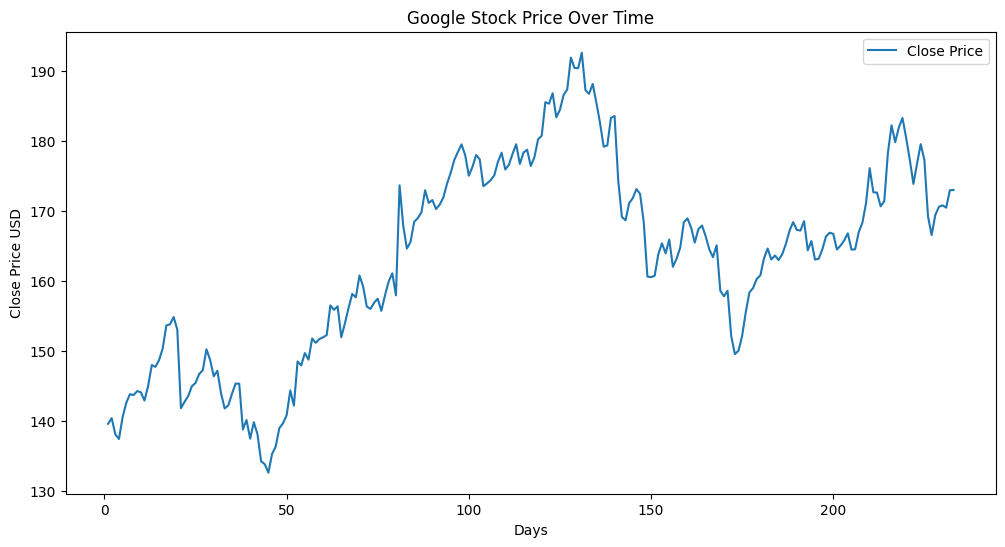

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 60, 50)         │         2,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,701 (30.08 KB)

 Trainable params: 7,701 (30.08 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 143ms/step - loss: 0.5205 - val_loss: 0.0126
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.1646 - val_loss: 0.0140
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.1313 - val_loss: 0.0119
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.1356 - val_loss: 0.0198
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.1327 - val_loss: 0.0058
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.1140 - val_loss: 0.0057
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0931 - val_loss: 0.0143
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0831 - val_loss: 0.0081
Epoch 9/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0954 - val_loss: 0.0107
Epoch 10/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0751 - val_loss: 0.0058
Epoch 11/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0643 - val_loss: 0.0130


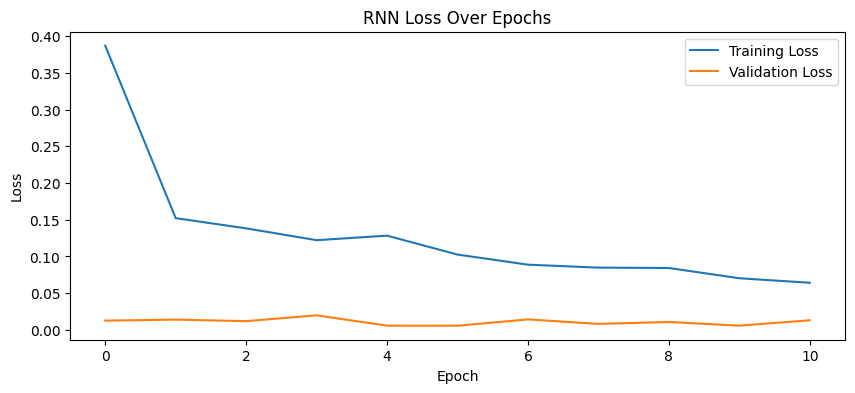

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


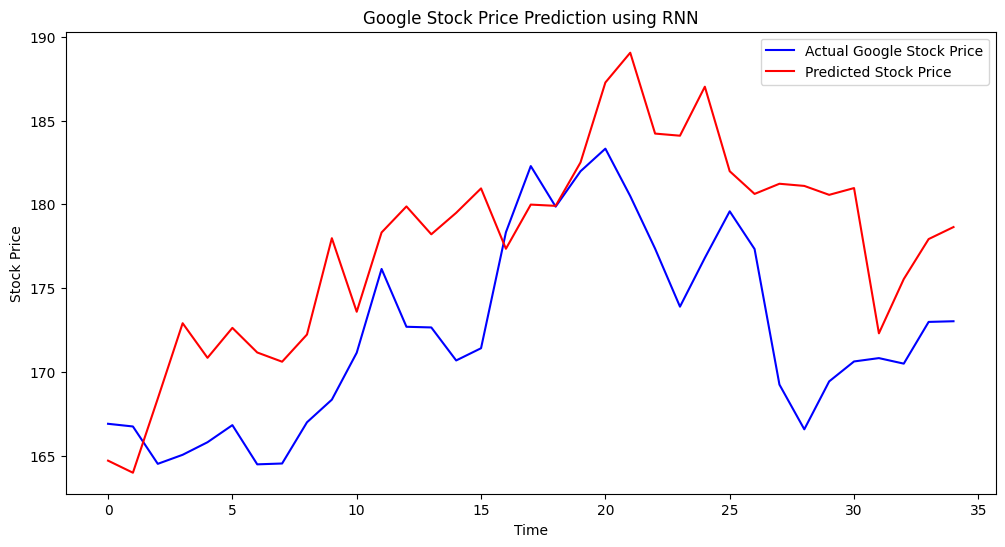

Root Mean Squared Error (RMSE): 6.863600991249762


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Load the dataset
df = pd.read_csv('GOOG.csv')  # Make sure this file is in your current directory
print(df.head())
print(df.info())

# Ensure 'Close' column is numeric and drop missing values
df['Close'] = pd.to_numeric(df['Close'], errors='coerce')
df = df.dropna(subset=['Close'])


# Plot closing prices
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Close Price')
plt.title('Google Stock Price Over Time')
plt.xlabel('Days')
plt.ylabel('Close Price USD')
plt.legend()
plt.show()

# Focus on 'Close' prices
data = df[['Close']].values

# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Prepare sequences for RNN
sequence_length = 60
X, y = [], []
for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i-sequence_length:i, 0])
    y.append(scaled_data[i, 0])

X = np.array(X)
y = np.array(y)

# Reshape for RNN input (samples, timesteps, features)
X = X.reshape((X.shape[0], X.shape[1], 1))

# Train-test split (80-20)
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build RNN model
model = Sequential()
model.add(SimpleRNN(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(SimpleRNN(units=50))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

# Train with early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=5)
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stop])

# Plot training history
plt.figure(figsize=(10, 4))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('RNN Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Predict on test set
y_pred = model.predict(X_test)

# Inverse transform the predictions and actuals
y_pred_inv = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot predicted vs actual
plt.figure(figsize=(12, 6))
plt.plot(y_test_inv, color='blue', label='Actual Google Stock Price')
plt.plot(y_pred_inv, color='red', label='Predicted Stock Price')
plt.title('Google Stock Price Prediction using RNN')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Evaluate performance
rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
print(f'Root Mean Squared Error (RMSE): {rmse}')
